
# Predicting Employee Attrition

## Introduction
Employee attrition is a significant challenge in human resource management, referring to the loss of employees from an organization. By predicting attrition, companies can proactively manage and retain valuable staff. This project demonstrates the process of analyzing employee attrition using a dataset, covering data preprocessing, visualization, and the application of various machine learning models.


#### Importing Libraries


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, MeanShift
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE


####  Loading Data


In [24]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Dataset Information


In [25]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
df.info()


The dataset has 1470 rows and 35 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-n

#### Exploratory Data Analysis


###### Distribution of Attrition


<ipython-input-26-b712cc5701d1>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




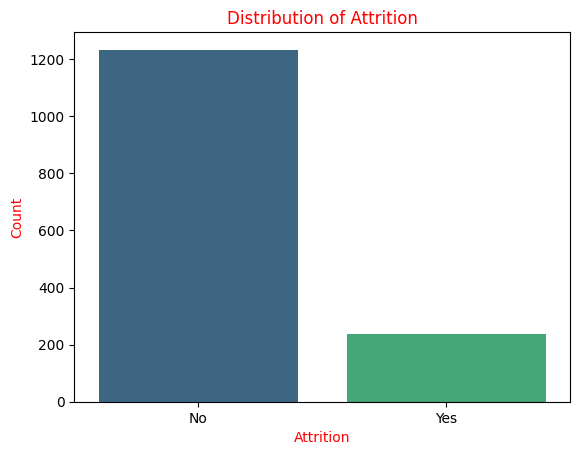

In [26]:
attrition_counts = df['Attrition'].value_counts()
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')
plt.title('Distribution of Attrition', color='r')
plt.xlabel('Attrition', color='r')
plt.ylabel('Count', color='r')
plt.show()


###### Distribution of Age


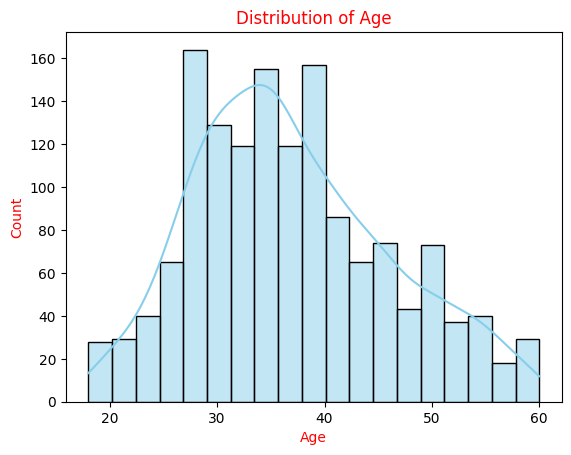

In [27]:
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age', color='r')
plt.xlabel('Age', color='r')
plt.ylabel('Count', color='r')
plt.show()


###### Distribution of Monthly Income


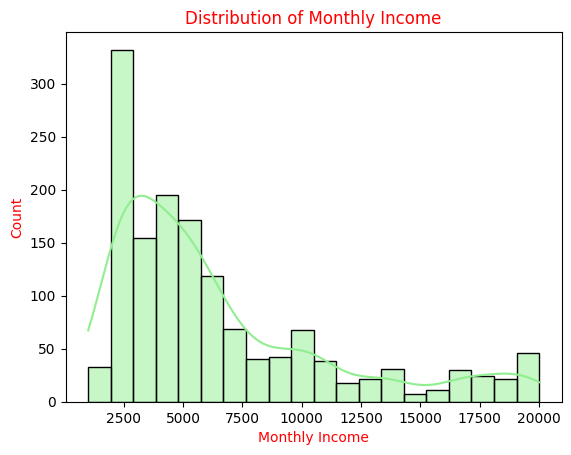

In [28]:
sns.histplot(df['MonthlyIncome'], kde=True, color='lightgreen')
plt.title('Distribution of Monthly Income', color='r')
plt.xlabel('Monthly Income', color='r')
plt.ylabel('Count', color='r')
plt.show()


#### Data Cleaning


In [29]:
threshold = 0.8
num_threshold = int((1 - threshold) * len(df))
df_cleaned = df.dropna(axis=1, thresh=num_threshold)
dropped_columns = set(df.columns) - set(df_cleaned.columns)
print(f"Dropped columns with more than {threshold * 100}% missing values: {dropped_columns}")
print("Cleaned DataFrame shape:", df_cleaned.shape)


Dropped columns with more than 80.0% missing values: set()
Cleaned DataFrame shape: (1470, 35)


####  Encoding Categorical Variables


In [30]:
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: encoder.fit_transform(col.astype(str)))
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


####  Creating Gaussian Distributions and Removing Unnecessary Attributes


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning:

divide by zero encountered in divide



Excluded attributes with std < 0.8: ['EmployeeCount', 'Over18', 'StandardHours']


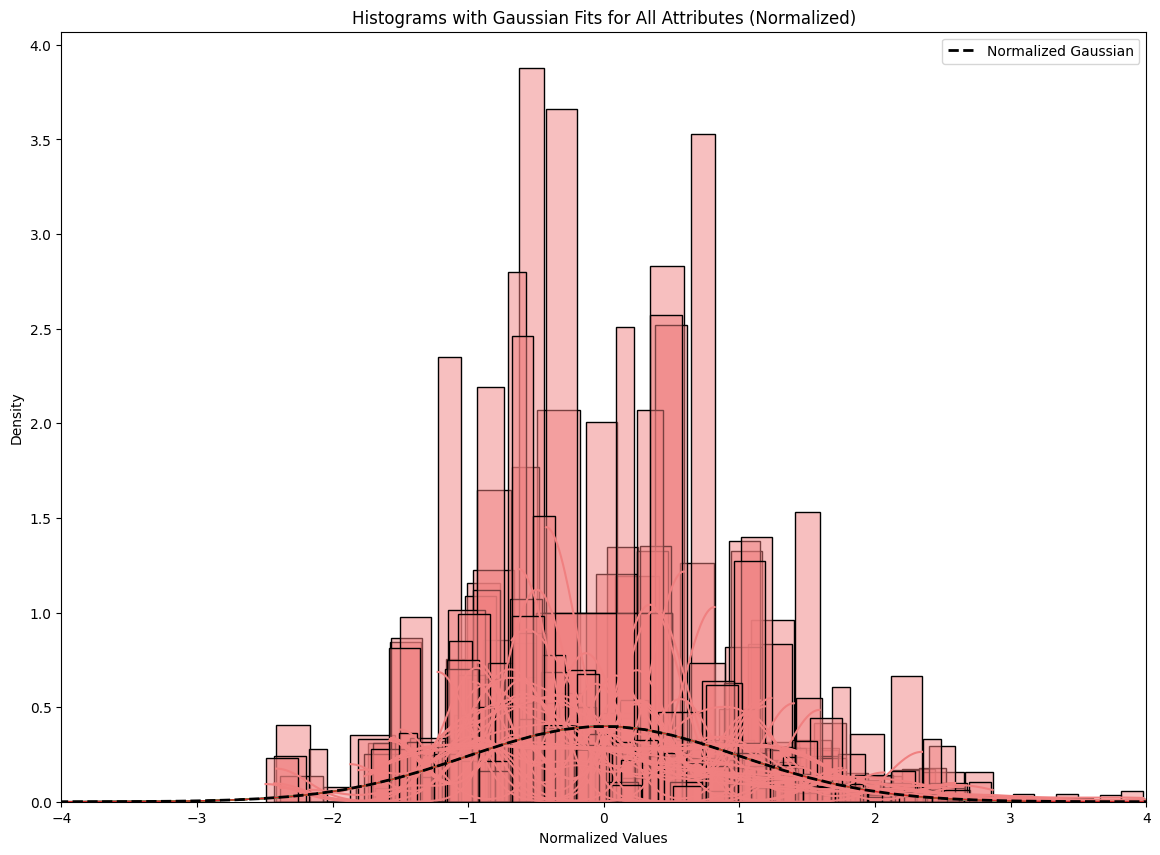

(1470, 31)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,1
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,0
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,1
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,0
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0


In [31]:
attrition_column = df['Attrition']
df = df.drop(columns=['Attrition'])
df_original = df.copy()
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

plt.figure(figsize=(14, 10))
exclude_attributes = []

for attribute in df.columns:
    sns.histplot(df[attribute], kde=True, stat='density', color='lightcoral')
    mu, std = norm.fit(df[attribute])
    xmin, xmax = plt.xlim()
    x = np.linspace(-4, 4, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=1)
    if std < 0.8:
        exclude_attributes.append(attribute)

x_norm = np.linspace(-10, 10, 100)
p_norm = norm.pdf(x_norm, 0, 1)
plt.plot(x_norm, p_norm, 'k--', linewidth=2, label='Normalized Gaussian')
df.drop(exclude_attributes, axis=1, inplace=True)
print(f"Excluded attributes with std < 0.8: {exclude_attributes}")

plt.title('Histograms with Gaussian Fits for All Attributes (Normalized)')
plt.xlabel('Normalized Values')
plt.ylabel('Density')
plt.xlim(-4, 4)
plt.legend()
plt.show()

print(df.shape)
df['Attrition'] = attrition_column
df.head()


#### Visualizing Target Variable Distribution


In [32]:
fig = px.pie(df, names='Attrition', title='Target Variable: Attrition', template="ggplot2")
fig.update_traces(rotation=120, pull=[0.3], textinfo="percent")
fig.show()


#### Feature Extraction


###### PCA Feature Extraction


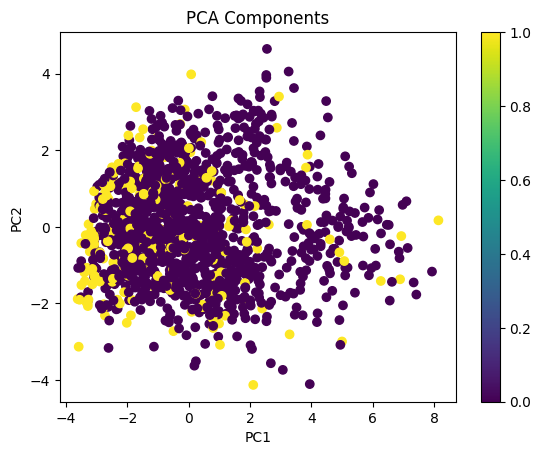

In [33]:
y = df['Attrition']
X = df.drop('Attrition', axis=1)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
y = encoder.fit_transform(y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Attrition'] = y

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Attrition'], cmap='viridis')
plt.title('PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


#### Handling Class Imbalance

In [34]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


#### Splitting Data into Train and Test Sets


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

def show_confu(y_test, y_test_pred, model):
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred) * 100))
    print('Precision: %.2f%%' % (precision_score(y_test, y_test_pred, zero_division=1) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_test_pred, zero_division=1) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_test_pred, zero_division=1) * 100))

    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()


#### Model Selection and Comparison

###### K-Nearest Neighbors

Accuracy: 61.62%
Precision: 61.24%
Recall: 63.88%
F1_Score: 62.53%


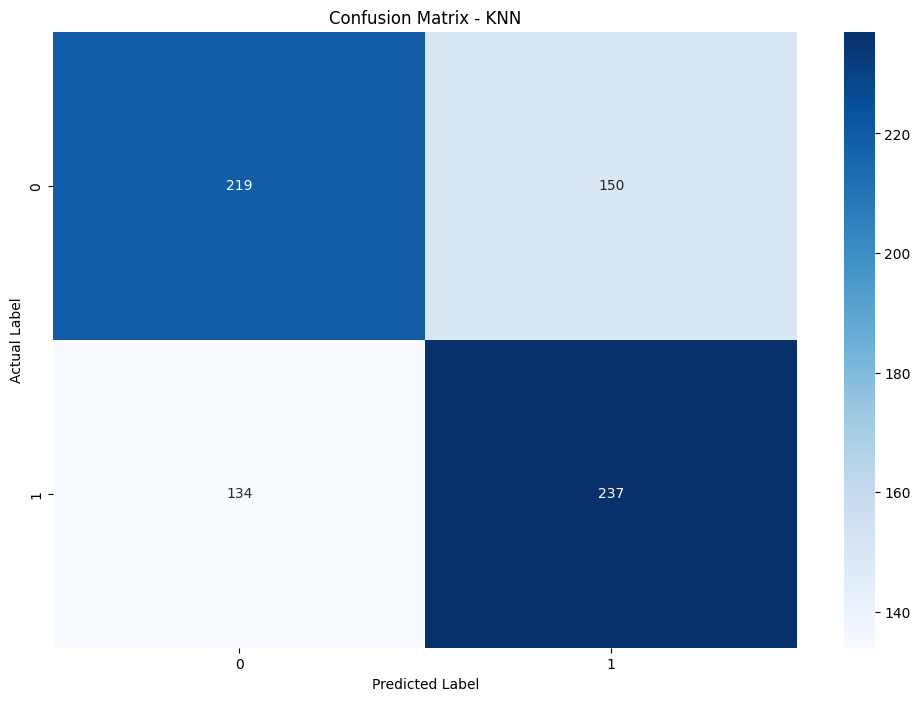

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_pca, y_train)
y_test_pred = knn_classifier.predict(X_test_pca)
show_confu(y_test, y_test_pred, 'KNN')


###### Support Vector Machine

Accuracy: 62.70%
Precision: 62.47%
Recall: 64.15%
F1_Score: 63.30%


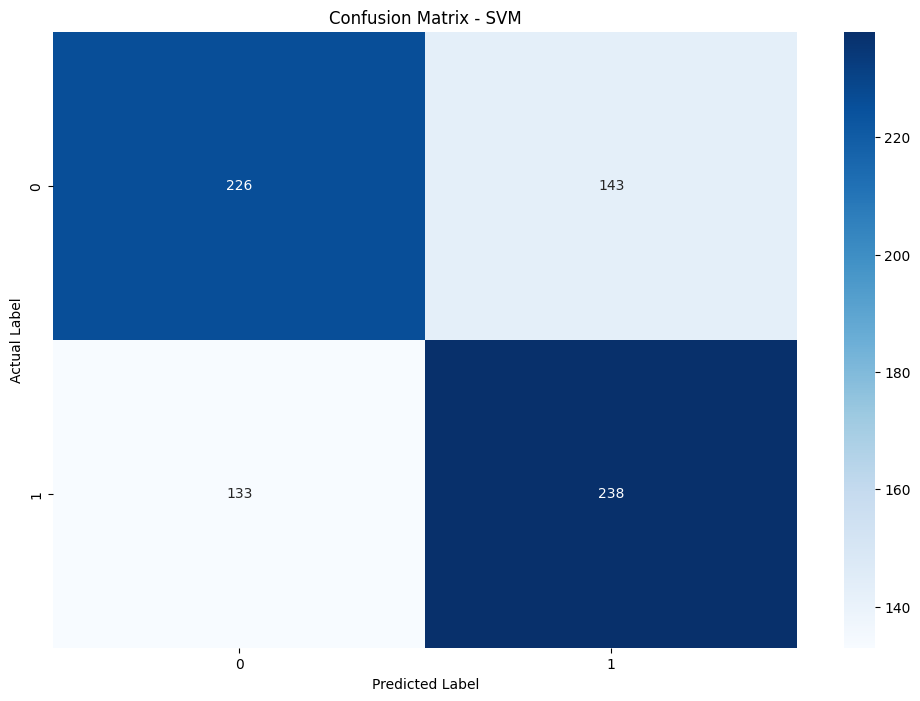

In [37]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_pca, y_train)
y_test_pred = svm_classifier.predict(X_test_pca)
show_confu(y_test, y_test_pred, 'SVM')


###### Decision Tree

Accuracy: 58.11%
Precision: 58.64%
Recall: 55.80%
F1_Score: 57.18%


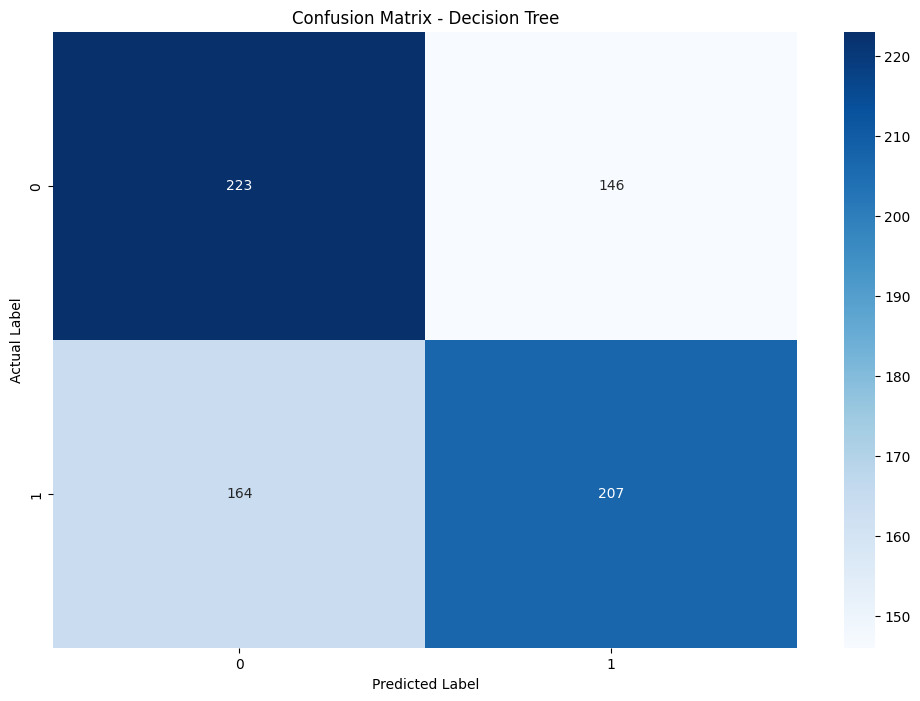

In [38]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_pca, y_train)
y_test_pred = tree_classifier.predict(X_test_pca)
show_confu(y_test, y_test_pred, 'Decision Tree')


###### Mean-Shift Clustering

Accuracy: 49.86%
Precision: 100.00%
Recall: 0.00%
F1_Score: 0.00%


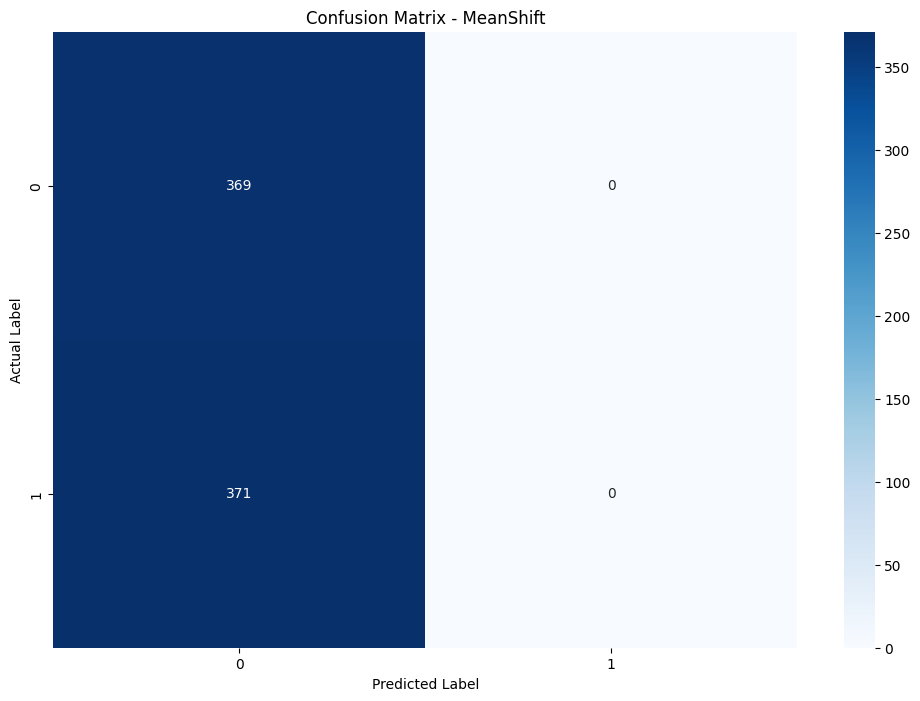

In [39]:
mean_shift_classifier = MeanShift()
mean_shift_classifier.fit(X_train_pca)
y_test_pred = mean_shift_classifier.predict(X_test_pca)

unique_labels = np.unique(y_test_pred)
num_clusters = len(unique_labels)
cluster_dict = {unique_labels[i]: i for i in range(num_clusters)}
mapped_labels = [cluster_dict[label] for label in y_test_pred]
show_confu(y_test, mapped_labels, 'MeanShift')


###### Neural Network

Accuracy: 64.59%
Precision: 65.98%
Recall: 60.65%
F1_Score: 63.20%


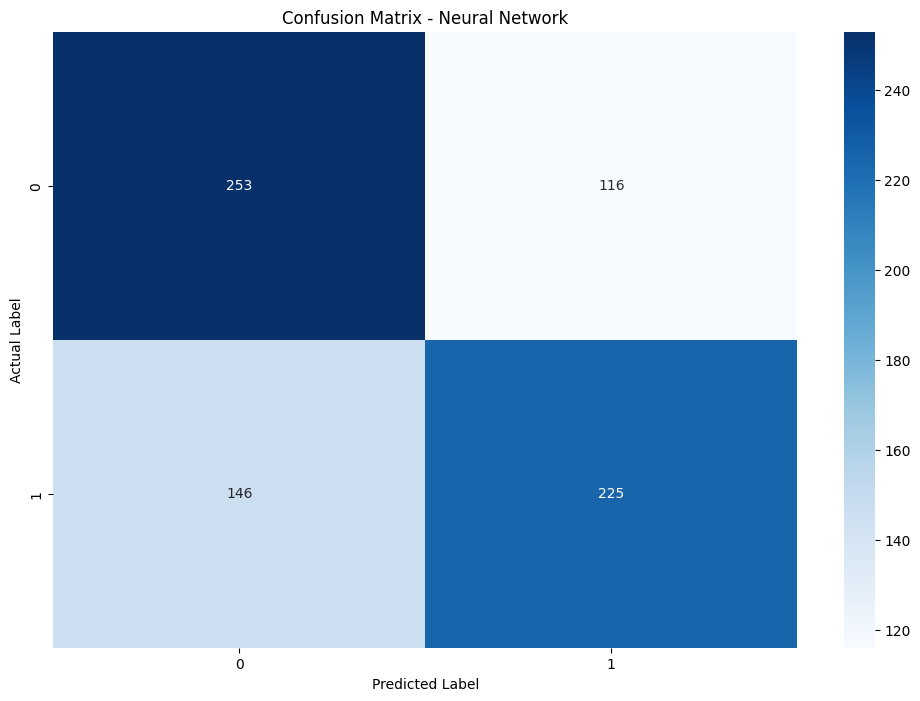

In [40]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_pca, y_train)
y_test_pred = mlp_classifier.predict(X_test_pca)
show_confu(y_test, y_test_pred, 'Neural Network')


#### Hyperparameter Tuning

###### Grid Search for SVM

Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy: 64.46%
Precision: 66.77%
Recall: 57.95%
F1_Score: 62.05%


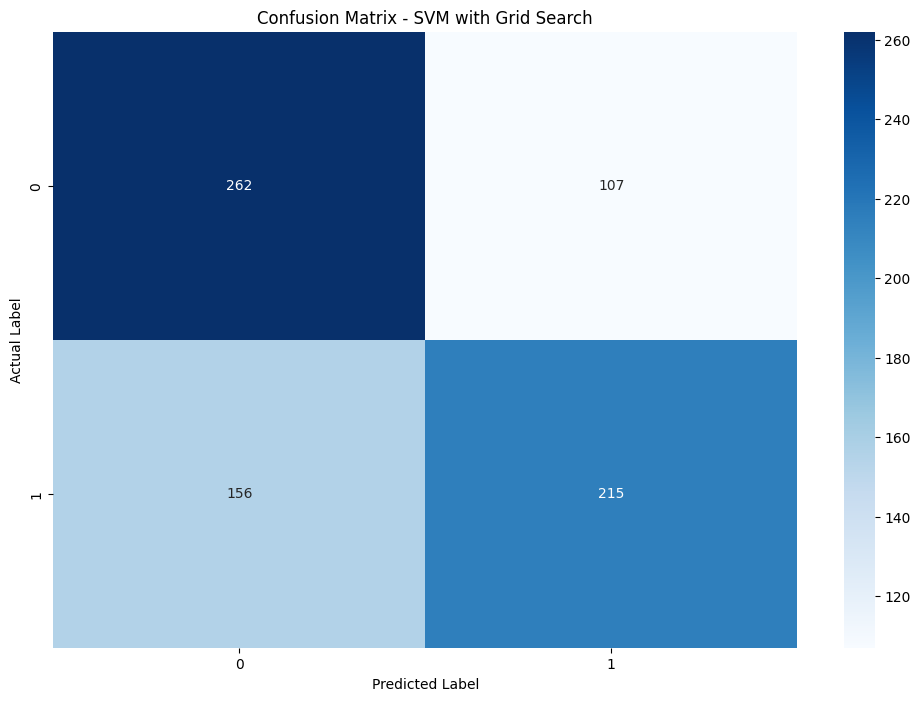

In [41]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_pca, y_train)
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")
best_svm = grid_search_svm.best_estimator_
y_test_pred = best_svm.predict(X_test_pca)
show_confu(y_test, y_test_pred, 'SVM with Grid Search')


#### Model Comparison

<ipython-input-43-b256349a1037>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




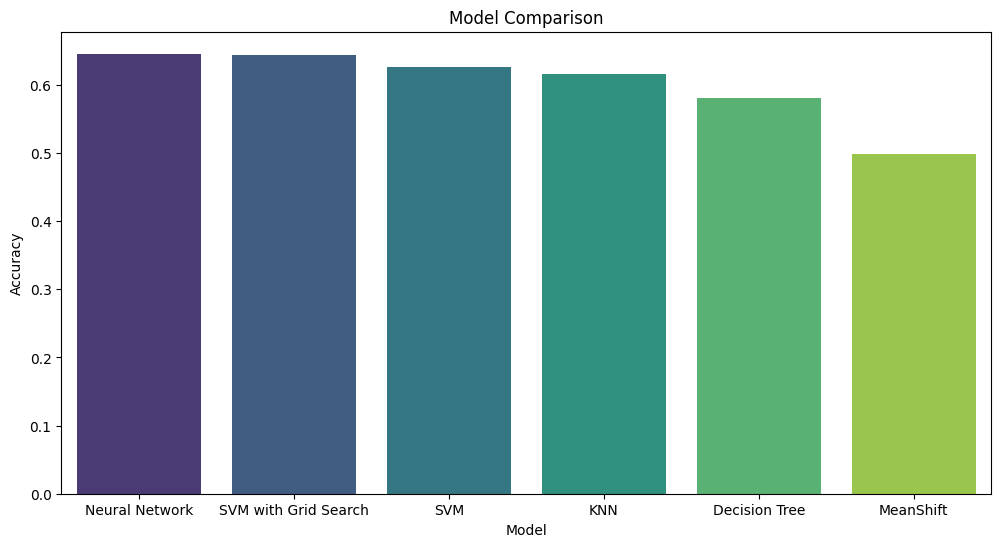

In [43]:
models = ['KNN', 'SVM', 'Decision Tree', 'MeanShift', 'Neural Network', 'SVM with Grid Search']
accuracy = [accuracy_score(y_test, knn_classifier.predict(X_test_pca)),
            accuracy_score(y_test, svm_classifier.predict(X_test_pca)),
            accuracy_score(y_test, tree_classifier.predict(X_test_pca)),
            accuracy_score(y_test, mean_shift_classifier.predict(X_test_pca)),
            accuracy_score(y_test, mlp_classifier.predict(X_test_pca)),
            accuracy_score(y_test, best_svm.predict(X_test_pca))]

model_performance = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
model_performance.sort_values(by='Accuracy', ascending=False, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
